## Data analysis of patients data

@ Olivier (data, code), @ Liubov (code)

Here we show example of how to analyzer patients data of pain levels collected by Olivier.

This is the open-source part of the MonsterMizer.
You can find open-sourced data from github: MonsterMizer Open Data.
You can find a first analysis of some of the data and the corresponding open-sourced code here: first experiment.
For any other information, feel free to email olivier.mirat.om@gmail.com or liubov.tupikina@cri-paris.org






# Main steps and table of content

1. [Loading data](#load-data)
2. [Visualizing time series data](#visualise)
3. [Moving average, Rolling windows](#moveav)
4. [Seasonality, Frequencies, Trends in data time-series](#trend)
6. [Correlation vs. causation](#correlation)

# 1. Load data  <a name="load-data"></a>

First let us load data. In this case the data will be simply time-series, series of data points indexed in time order $P(t)$. We can also just simply load final csv data file. 

In [1]:

import pickle
import numpy as np
import csv
import datetime
import pandas as pd
import os, os.path
import re

# Creation of the dataframe where everything will be stored
i = pd.date_range('2015-11-19', periods=1460, freq='1D')
sLength = len(i)
empty = pd.Series(np.zeros(sLength)).values
d = {'basisPeakSteps': empty, 'steps': empty, 'denivelation': empty, 'kneePain': empty, 'handsAndFingerPain': empty, 'foreheadAndEyesPain': empty, 'forearmElbowPain': empty, 'aroundEyesPain': empty, 'shoulderNeckPain': empty, 'painthreshold': np.full((sLength),3.4), 'whatPulseKeysC1': empty, 'whatPulseClicksC1': empty, 'manicTimeC1': empty, 'whatPulseKeysC2': empty, 'whatPulseClicksC2': empty, 'manicTimeC2': empty, 'whatPulseKeysC3': empty, 'whatPulseClicksC3': empty, 'manicTimeC3': empty, 'whatPulseKeysT': empty, 'whatPulseClicksT': empty, 'whatPulseT': empty, 'manicTimeT': empty, 'walk': empty, 'roadBike': empty, 'mountainBike': empty, 'swimming': empty, 'surfing': empty, 'climbing': empty, 'viaFerrata': empty, 'alpiSki': empty, 'downSki': empty, 'eyeRelatedActivities': empty, }
data = pd.DataFrame(data=d, index=i)

filepath = "C:/Users/lyubo/Documents/DATA_networks/patients_data/MonsterMizer-master"#'C:/Users/tupikina/Documents/Python_Scripts/MonsterMizer-master'


# Storing BasisPeak data in dataframe
if False: # This step takes a long time, put to False if you want to skip it, and to True otherwise
  filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/bodymetrics.csv'
  with open(filename, newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    count = 0
    for row in spamreader:
      count=count+1
      if (count>2 and len(row)):
        date  = row[0][0:10]
        data.loc[date,'basisPeakSteps'] = data.loc[date,'basisPeakSteps'] + int(row[5])
        if count % 10000 == 0:
          print(count,'lines done out of the 532 330 needed for the basis peak')

# Storing fitbit data in dataframe
directory = os.fsencode(filepath+'/MonsterMizerOpenData/Participant1PublicOM/dailyFitBitPerMonth/')
for file in os.listdir(directory):
  name = os.fsdecode(file)
  if name.endswith(".csv"): 
    filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/dailyFitBitPerMonth/'+name
    with open(filename, newline='') as csvfile:
      spamreader = csv.reader(csvfile)
      count = 0
      for row in spamreader:
        count=count+1
        if (count>2 and len(row)):
          day   = row[0][0:2]
          month = row[0][3:5]
          year  = row[0][6:10]
          date  = year+'-'+month+'-'+day
          data.loc[date,'steps']        = int(row[2].replace(',',''))
          data.loc[date,'denivelation'] = int(row[4])

# Storing pain intensities in dataframe
filename = filepath +'/MonsterMizerOpenData/Participant1PublicOM/pain.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>2 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      dict = {'Knees' : 'kneePain',
              'Hands And Fingers' : 'handsAndFingerPain',
              'Forehead and Eyes' : 'foreheadAndEyesPain',
              'Forearm close to elbow' : 'forearmElbowPain',
              'Eyes (or around them)' : 'aroundEyesPain',
              'Shoulder Neck' : 'shoulderNeckPain'}
      if (row[3] in dict):
        data.loc[date,dict[row[3]]] = float(row[5])
        
# Storing whatPulse data in dataFrame
for num in ['1','2','3']:
  nbFiles = len([name for name in os.listdir(filepath+'/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/whatPulse/') if os.path.isfile(os.path.join('data/computerUsage/computer'+num+'/whatPulse/', name))])
  for i in range(1,nbFiles+1):
    filename = filepath +'/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/whatPulse/whatpulse-input-history'+str(i)+'.csv'
    with open(filename, newline='') as csvfile:
      spamreader = csv.reader(csvfile)
      count = 0
      for row in spamreader:
        count=count+1
        if (count>1 and len(row)):
          date  = row[0][0:10]
          data.loc[date,'whatPulseKeysC'+num] = int(row[1])
          data.loc[date,'whatPulseClicksC'+num] = int(row[2])
data['whatPulseKeysT'] = data['whatPulseKeysC1'] + data['whatPulseKeysC2'] + data['whatPulseKeysC3']
data['whatPulseClicksT'] = data['whatPulseClicksC1'] + data['whatPulseClicksC2'] + data['whatPulseClicksC3']
data['whatPulseT'] = data['whatPulseKeysT'] + data['whatPulseClicksT']

# Storing Manic Time data in dataFrame
for num in ['1','2','3']:
  filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/manicTime/manicTime.csv'
  with open(filename, newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    count = 0
    for row in spamreader:
      count=count+1
      if (count>1 and len(row)):
        if row[0][0:4] == "Acti":
          if num == '1':
            day   = row[1][0:2]
            month = row[1][3:5]
            year  = row[1][6:10]
          else:
            delimit = [m.start() for m in re.finditer('/', row[1])]
            month = row[1][0:delimit[0]]
            day   = row[1][delimit[0]+1:delimit[1]]
            if len(month)==1:
              month = '0' + month
            if len(day)==1:
              day = '0' + day
            year  = row[1][delimit[1]+1:delimit[1]+5]
          date  = year+'-'+month+'-'+day
          hours = int(row[3][0:1]) * 60 + int(row[3][2:4])
          data.loc[date,'manicTimeC'+num] = data.loc[date,'manicTimeC'+num] + hours
data['manicTimeT'] = data['manicTimeC1'] + data['manicTimeC2'] + data['manicTimeC3']

# Storing Sport data in dataframe
filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/sport.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>1 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      dict = {'Walk' : 'walk',
              'Road Bike' : 'roadBike',
              'Mt Bike' : 'mountainBike',
              'Swimming' : 'swimming',
              'Surfing' : 'surfing',
              'Climbing' : 'climbing',
              'Via Ferrata' : 'viaFerrata',
              'Alpi Ski' : 'alpiSki',
              'Down Ski' : 'downSki'}
      if (row[3] in dict):
        data.loc[date,dict[row[3]]] = 1

# Storing Eye related activity hours in dataframe
filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/eyeRelatedActivities.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>2 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      tot = 0
      if len(row[3]):
        tot = tot + int(row[3])
      if len(row[4]):
        tot = tot + int(row[4])
      if len(row[5]):
        tot = tot + int(row[5])
      if len(row[6]):
        tot = tot + int(row[6])
      data.loc[date,'eyeRelatedActivities'] = tot



In [12]:
# Saving the dataframe in a txt
output = open('data.txt', 'wb')
pickle.dump(data, output)
output.close()

# Save Numpy array to csv
np.savetxt('data.csv', data, delimiter=',', fmt='%d')
data.to_csv('data_patients.csv')
          

In [3]:
data.head(20)



,basisPeakSteps,steps,denivelation,kneePain,handsAndFingerPain,foreheadAndEyesPain,forearmElbowPain,aroundEyesPain,shoulderNeckPain,painthreshold,...,walk,roadBike,mountainBike,swimming,surfing,climbing,viaFerrata,alpiSki,downSki,eyeRelatedActivities
2015-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-25,0.0,0.0,0.0,5.7,3.0,3.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2015-11-26,0.0,0.0,0.0,5.0,2.8,3.9,0.0,0.0,0.0,3.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-27,0.0,0.0,0.0,5.0,2.8,3.9,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-28,0.0,0.0,0.0,6.0,2.0,2.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0


In [8]:
data.columns

Index(['basisPeakSteps', 'steps', 'denivelation', 'kneePain',
       'handsAndFingerPain', 'foreheadAndEyesPain', 'forearmElbowPain',
       'aroundEyesPain', 'shoulderNeckPain', 'painthreshold',
       'whatPulseKeysC1', 'whatPulseClicksC1', 'manicTimeC1',
       'whatPulseKeysC2', 'whatPulseClicksC2', 'manicTimeC2',
       'whatPulseKeysC3', 'whatPulseClicksC3', 'manicTimeC3', 'whatPulseKeysT',
       'whatPulseClicksT', 'whatPulseT', 'manicTimeT', 'walk', 'roadBike',
       'mountainBike', 'swimming', 'surfing', 'climbing', 'viaFerrata',
       'alpiSki', 'downSki', 'eyeRelatedActivities'],
      dtype='object')

# 2. Vizualize time-series  <a name="visualise"></a>
Now that we loaded our data using `dataframe` from `pandas` we can finally look inside the data. How we are going to do it? There are many ways. We can use standard python `matplotlib` libraries for this. 

plotting time series from first dynamical system


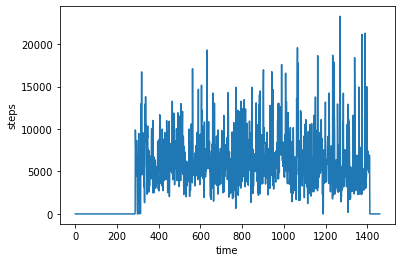

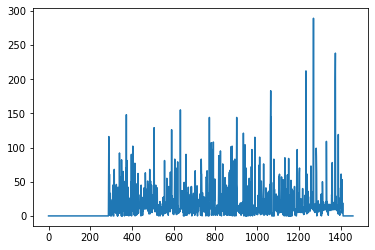

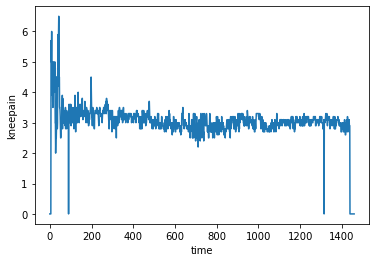

In [5]:
# Plot variables 

import pandas as pd
from matplotlib import pyplot as plt


'''tp.plot_timeseries(data, datatime, var_names)'''
array = data.values
#print(type(dataframe.values))
#print(array.shape)
print('plotting time series from first dynamical system')


plt.plot(array[:,1])
plt.ylabel('steps')
plt.xlabel('time')
plt.show()

plt.plot(array[:,2])
plt.show()

plt.plot(array[:,3])
plt.xlabel('time')
plt.ylabel('kneepain')
plt.show()

# Choose main variables: 
# we take denivelation, steps, pulse, roadbike 
# we want to predict knee pain for next days 


One may also want to plot distributions of time-series instead of sequence of time-series in time. Distributions may reveal other data properties.


3.027671232876712
3.0


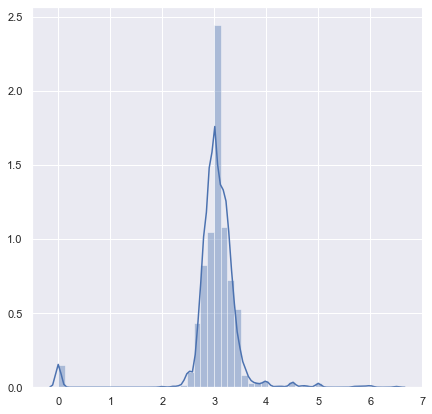

In [15]:
import seaborn as sns, numpy as np
sns.set()

f, ax = plt.subplots(figsize=(7, 7))
#ax.set( yscale="log")
ax = sns.distplot(array[:,3])


print(np.mean(array[:,3]))
print(np.median(array[:,3]))


# Alternative ways to visualise data 
Alternatively to visualising data as time-series, we can present them also as **distance matrices**, or recurrence plots. This can also highlight some similarities in data time-series for different variables. For definitions go to notebook `distance matrix `.

$M_{ij} = (P(t_i)-P(t_j))$

<Figure size 640x480 with 0 Axes>

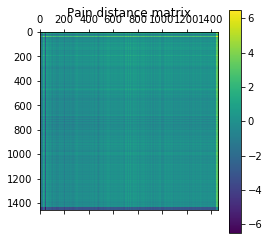

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Calculate distance matrix 

def distance_matrix(time_series):
    '''
    input: time-series to which we calculate time_series(t_i) - time_series(t_j)
    output: distance matrix plotted in grey scales
    '''
    
    Time = len(time_series)
    
    dist_mat = np.zeros((Time, Time))
    
    for ind in range(0,Time):
        for knd in range(0,Time): #loop through all values
            dist_mat[ind,knd] = (time_series[ind] - time_series [knd]) # can be also absolute value
    
    return dist_mat




dist_mat_pain = distance_matrix(array[:,3])

fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#plt.figure(figsize=(40,40))
plt.matshow(dist_mat_pain)
plt.colorbar()
plt.title('Pain distance matrix')
plt.show()




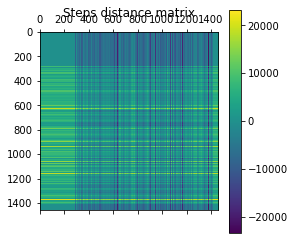

In [25]:
dist_mat_pain_step = distance_matrix(array[:,1])


plt.matshow(dist_mat_pain_step)
plt.colorbar()
plt.title('Steps distance matrix')
plt.show()


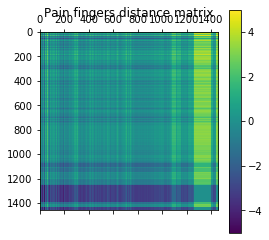

In [24]:
dist_mat_pain_fing = distance_matrix(array[:,4])


plt.matshow(dist_mat_pain_fing)
plt.colorbar()
plt.title('Pain fingers distance matrix')
plt.show()




# 3. Moving average (MA) calculation for time-series  <a name="moveav"></a>

1. Why do we need rolling mean? Because we sometimes there are some missing values in time-series, which may lead to missleading results when used in further prediction modules, etc. 
2. For calculating rolling mean for time-series in python is `rolling_mean`
3. Be careful since MA can actually kill the outliers.

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


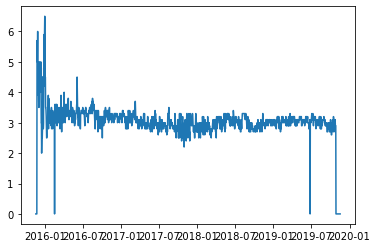

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

ticker = 'AMD'
timeframe = '1y'

df = data #p.chartDF(ticker, timeframe)
#df = df[['close']]
#df.reset_index(level=0, inplace=True)
#df.columns=['ds','y']
plt.plot(data.kneePain)
plt.show()

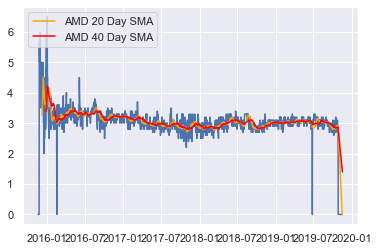

In [22]:
plt.plot(data.kneePain)

rolling_mean = data.kneePain.rolling(window=20).mean()
rolling_mean40 = data.kneePain.rolling(window=40).mean()

#rolling_mean2 = data.kneePain.rolling(window=50).mean()plt.plot(df.ds, df.y, label='AMD')
plt.plot(rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(rolling_mean40, label='AMD 40 Day SMA', color='red')
#plt.plot(rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [7]:
print(type(array[:,3]))

<class 'numpy.ndarray'>


# 4. Seasonality in time-series  <a name="trend"></a>


Next, let’s  explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality

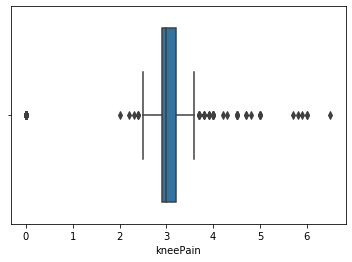

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p
import seaborn as sns


#fig, ax = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

#for name, ax in zip(['var1', 'var2', 'var3'], axes):
sns.boxplot(x = data["kneePain"]) #sns.boxplot(data=data, y='kneePain', ax=ax)

#ax.set_ylabel('data')
#ax.set_title('Knee pain')
# Remove the automatic x-axis label from all but the bottom subplot
#if ax != axes[-1]:
#    ax.set_xlabel('')










# Frequency 


When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas. For example, let’s use the date_range() function to create a sequence of uniformly spaced dates from X date through Y date at daily frequency.

Frequency, e.g. daily vs.weekly allows us to resample data also easier.

In [ ]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

# 5. Trends  <a name="moveav"></a>
Finding and highlighting trends in data is important.
One can use different models, which can identify trends in data. Some of them are using linear regression models (if you have hypothesis that there must be some logic behind). 

Alternatively one can use built-in modules, such as `seasonal_decompose` from `statsmodels`. In this case Here, we assume that the model is additive: the value of our variable is given by the summation of the components above:

$Y(t)=level + trend + seasonality + noise$

`seasonal_decompose` takes as an input pandas dataframe, or one subcolumn of dataframe, e.g. in our case data.kneePain.

**Comment:** one needs to be careful here when you have very noisy data without any seasonality properties.

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose


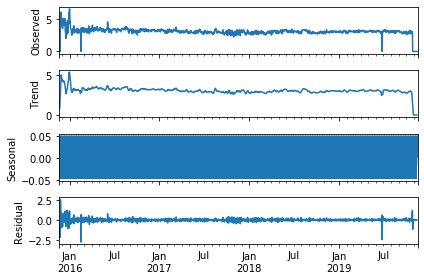

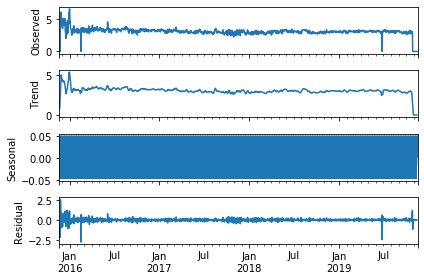

In [8]:

result = seasonal_decompose(data.kneePain, model='additive')
result.plot()

If we would have some seasonality in our data, e.g. it would be dependent on cold weather, or allergy depending on the time of some flowers blooming, we could then extract seasonality.

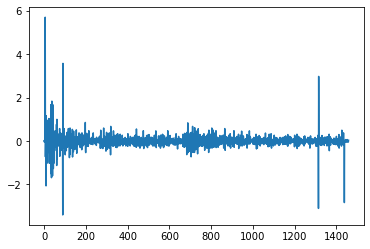

In [10]:
import numpy as np
x=data.kneePain-result.seasonal
diff=np.diff(x)
plt.plot(diff)

# 5. Correlations  vs. causality <a name="correlation"></a>

First before even considering any measures for correlation let us just simply play with different variables in our data and plot them one across the other and see whether we see any eye-seen correlations. 

**Comment:** be careful, since our eyes may see trends and correlations somewhere where there is just coinsidential co-ocurrence. For distinguishing those we would need to introduce some statistical measurues. 
We will start with autocorrelation.

## Autocorrelation 


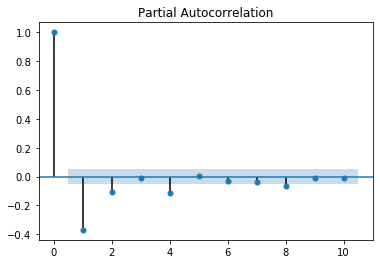

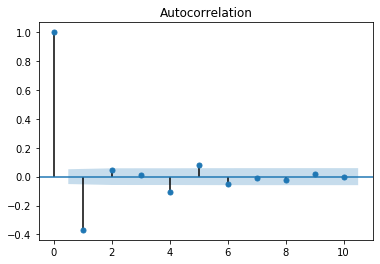

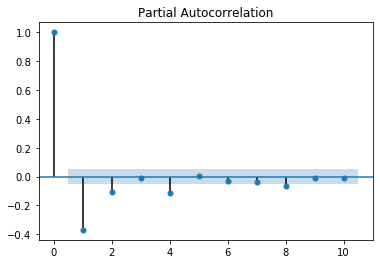

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

x=data.kneePain-result.seasonal
diff=np.diff(x)
plt.plot(diff)

plot_acf(diff, lags=10)
plot_pacf(diff, lags=10)

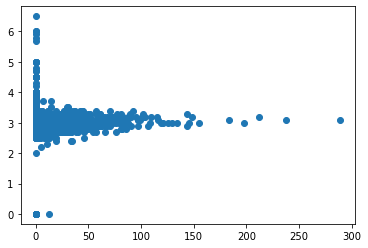

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

size = 1000
x = array[:,2]
y = array[:,3]
#z = y + np.random.normal(size=size)
#X = pd.DataFrame({'x': x, 'y': y, 'z': z})

plt.plot(x,y,'o')
plt.show()